### What is logistic Regression ?
Logistic Regression is a statistical method used for binary classification, meaning it predicts the probability of an outcome that can only have two possible values (e.g., Yes/No, True/False, 0/1). It’s widely used in machine learning for tasks like spam detection, disease prediction, or customer churn analysis.

#### Implementing logistic regression from scratch

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('./datasets/data.csv')
df.drop(columns='Unnamed: 32',axis=1,inplace=True)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [7]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [8]:
df.drop('id',axis=1,inplace=True)

In [9]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

In [11]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
# Now let's get highly correlated features with the target
corr = df.corr()

<Axes: >

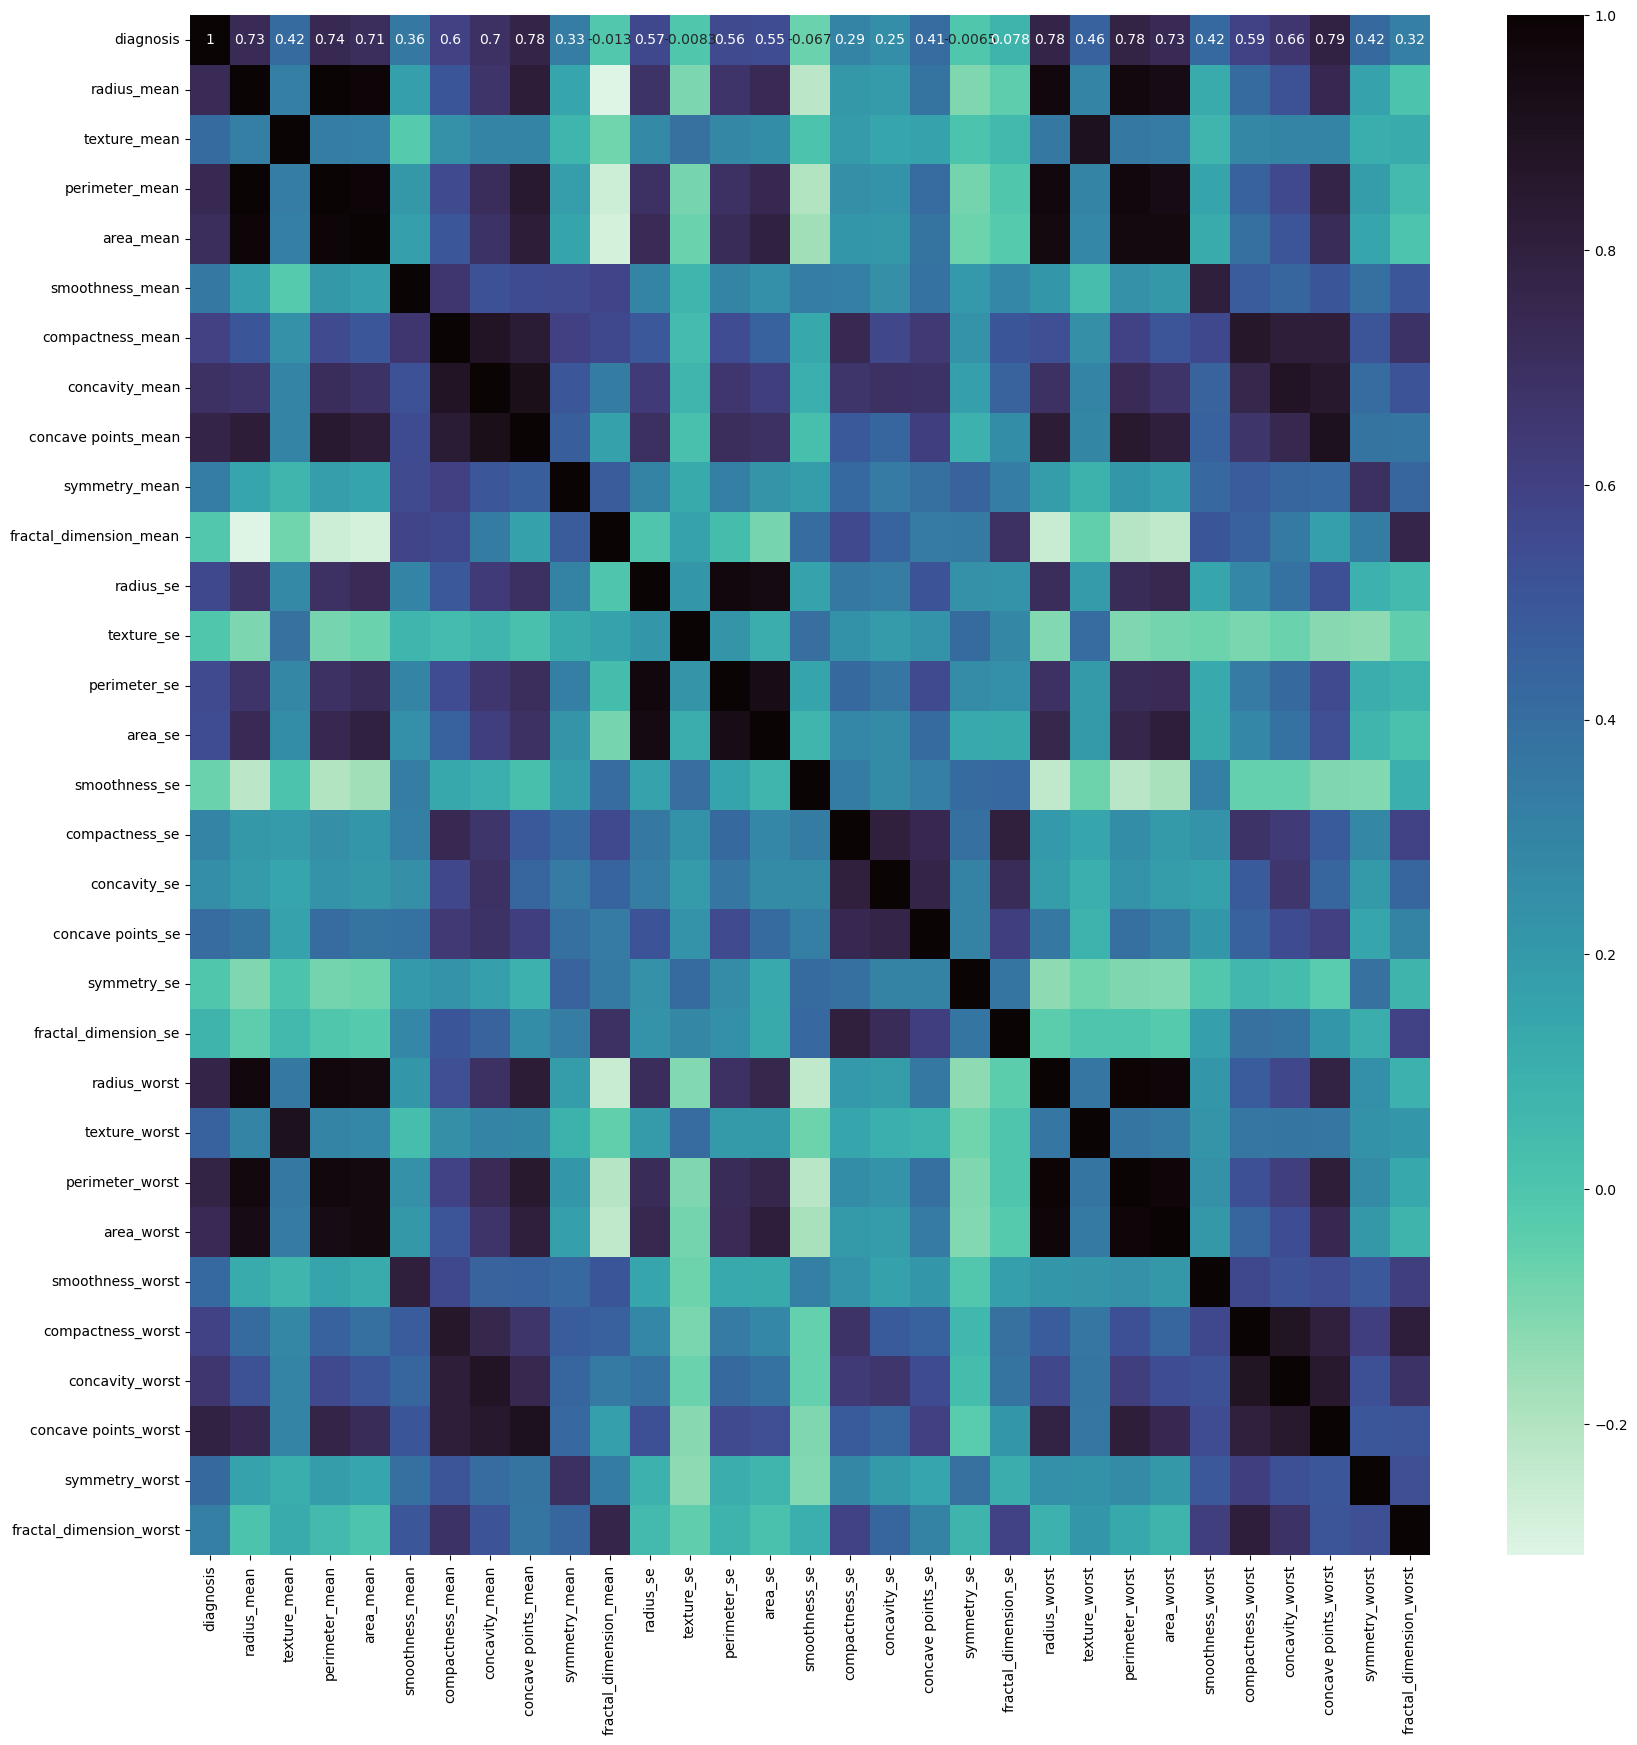

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='mako_r',annot=True)

In [16]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [18]:
X = df[names].values
y = df['diagnosis'].values

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

#### Standarize the Data

In [20]:
def standarize_data(X_train,X_test):
    # Calculate mean and standard deviation using the training data
    mean = np.mean(X_train,axis=0)
    std = np.std(X_train,axis=0)

    # standarize the data 
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    
    return X_train, X_test

X_train, X_test = standarize_data(X_train,X_test)

In [21]:
def sigmoid(z):
    # Compute the sigmoid function using the formula: 1 / (1 + e^(-z)).
    sigmoid_result = 1 / (1 + np.exp(-z))

    # Return the computed sigmoid value.
    return sigmoid_result

In [22]:
z = np.linspace(-12, 12, 200)

fig = px.line(x=z, y=sigmoid(z),title='Logistic Function',template="plotly_dark")
fig.update_layout(
    title_font_color="#41BEE9", 
    xaxis=dict(color="#41BEE9"), 
    yaxis=dict(color="#41BEE9") 
)
fig.show()

In [ ]:
class LogisticRegression:
    """
    Logistic Regression model.

    Parameters:
        learning_rate (float): Learning rate for the model.

    Methods:
        initialize_parameter(): Initializes the parameters of the model.
        sigmoid(z): Computes the sigmoid activation function for given input z.
        forward(X): Computes forward propagation for given input X.
        compute_cost(predictions): Computes the cost function for given predictions.
        compute_gradient(predictions): Computes the gradients for the model using given predictions.
        fit(X, y, iterations, plot_cost): Trains the model on given input X and labels y for specified iterations.
        predict(X): Predicts the labels for given input X.
    """

    def __init__(self, learning_rate=0.0001):
        np.random.seed(1)
        self.learning_rate = learning_rate

    def initialize_parameter(self):
        """
        Initializes the parameters of the model.
        """
        self.W = np.zeros(self.X.shape[1])
        self.b = 0.0


    def forward(self, X):
        """
        Computes forward propagation for given input X.

        Parameters:
            X (numpy.ndarray): Input array.

        Returns:
            numpy.ndarray: Output array.
        """
#         print(X.shape, self.W.shape)
        Z = np.matmul(X, self.W) + self.b
        A = sigmoid(Z)
        return A

    def compute_cost(self, predictions):
        """
        Computes the cost function for given predictions.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.

        Returns:
            float: Cost of the model.
        """
        m = self.X.shape[0]  # number of training examples
        # compute the cost
        cost = np.sum((-np.log(predictions + 1e-8) * self.y) + (-np.log(1 - predictions + 1e-8)) * (
                1 - self.y))  # we are adding small value epsilon to avoid log of 0
        cost = cost / m
        return cost

    def compute_gradient(self, predictions):
        """
        Computes the gradients for the model using given predictions.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.
        """
        # get training shape
        m = self.X.shape[0]

        # compute gradients
        self.dW = np.matmul(self.X.T, (predictions - self.y))
        self.dW = np.array([np.mean(grad) for grad in self.dW])

        self.db = np.sum(np.subtract(predictions, self.y))

        # scale gradients
        self.dW = self.dW * 1 / m
        self.db = self.db * 1 / m


    def fit(self, X, y, iterations, plot_cost=True):
        """
        Trains the model on given input X and labels y for specified iterations.

        Parameters:
            X (numpy.ndarray): Input features array of shape (n_samples, n )
            y (numpy.ndarray): Labels array of shape (n_samples, 1)
            iterations (int): Number of iterations for training.
            plot_cost (bool): Whether to plot cost over iterations or not.

        Returns:
            None.
        """
        self.X = X
        self.y = y

        self.initialize_parameter()

        costs = []
        for i in range(iterations):
            # forward propagation
            predictions = self.forward(self.X)

            # compute cost
            cost = self.compute_cost(predictions)
            costs.append(cost)

            # compute gradients
            self.compute_gradient(predictions)

            # update parameters
            self.W = self.W - self.learning_rate * self.dW
            self.b = self.b - self.learning_rate * self.db

            # print cost every 100 iterations
            if i % 10000 == 0:
                print("Cost after iteration {}: {}".format(i, cost))

        if plot_cost:
            fig = px.line(y=costs,title="Cost vs Iteration",template="plotly_dark")
            fig.update_layout(
                title_font_color="#41BEE9", 
                xaxis=dict(color="#41BEE9",title="Iterations"), 
                yaxis=dict(color="#41BEE9",title="cost")
            )
            fig.show()


    def predict(self, X):
        """
        Predicts the labels for given input X.

        Parameters:
            X (numpy.ndarray): Input features array.

        Returns:
            numpy.ndarray: Predicted labels.
        """
        predictions = self.forward(X)
        return np.round(predictions)
    
